## About Dataset

### Context

The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

#### Features available are:

sex: insurance contractor gender, female, male

bmi: Body mass index (ideally 18.5 to 24.9)

children: Number of children covered by health insurance / Number of dependents

smoker: smoking habits

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance


### Acknowledgements

Insurance.csv file is obtained from the Machine Learning course website (Spring 2017) from Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6.

### Inspiration

Aim of the problem is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location.
The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

### Installing the Libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

### Importing the Dataset

In [6]:
df = pd.read_csv('insurance.csv') # import the CSV as a pandas dataframe

df.head() # show the first five rows

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

No missing values, we can move on.

In [10]:
# Check unique values in the 'region' column
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
# Check unique values in the 'sex' column
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
# Check the unique values in the 'smoker' column
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

<AxesSubplot:xlabel='children', ylabel='count'>

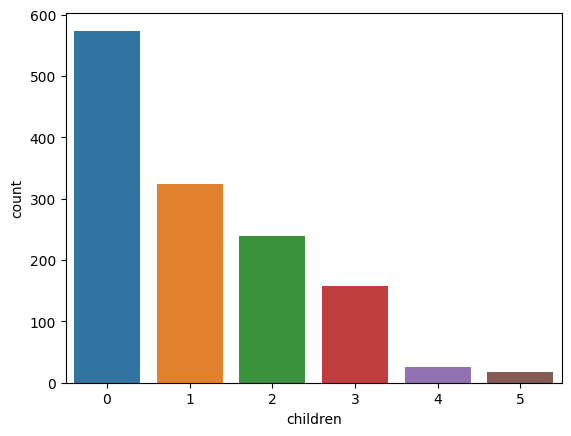

In [13]:
sns.countplot(data= df, x="children")


There are many people with no children and people with 1 and 2 are almost same.

In [14]:
# convert str values to int
le=LabelEncoder()
df=df.apply(le.fit_transform)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,1,0,102,0,1,3,1005
1,0,1,161,1,0,2,57
2,10,1,153,3,0,2,306
3,15,1,50,0,0,1,1097
4,14,1,112,0,0,1,254



### SEX
        1: female
        0: male

### SMOKER

        1: Yes
        0: No

### Region

        0:East
        1:North
        2:South
        3:West



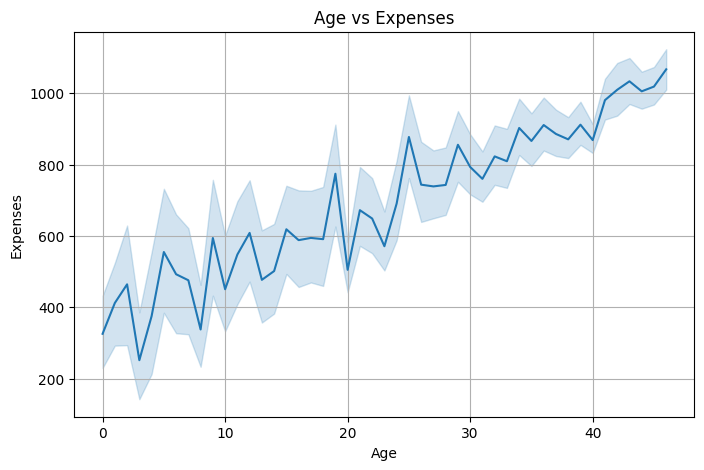

In [15]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='age', y='expenses')
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.title("Age vs Expenses")
plt.grid()
plt.show()

Expenses increases as the age of the person is increases.

Text(0.5, 1.0, 'sex vs expenses')

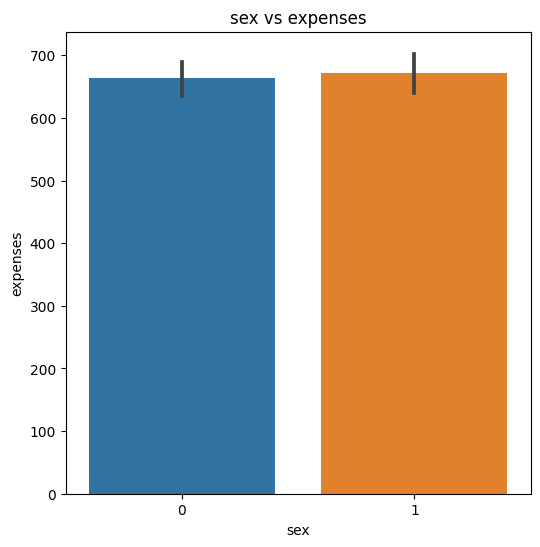

In [19]:
# sex vs expenses
# males have slightly greater insurance charges than females in general

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'expenses', data = df)

plt.title('sex vs expenses')

Text(0.5, 1.0, 'children vs expenses')

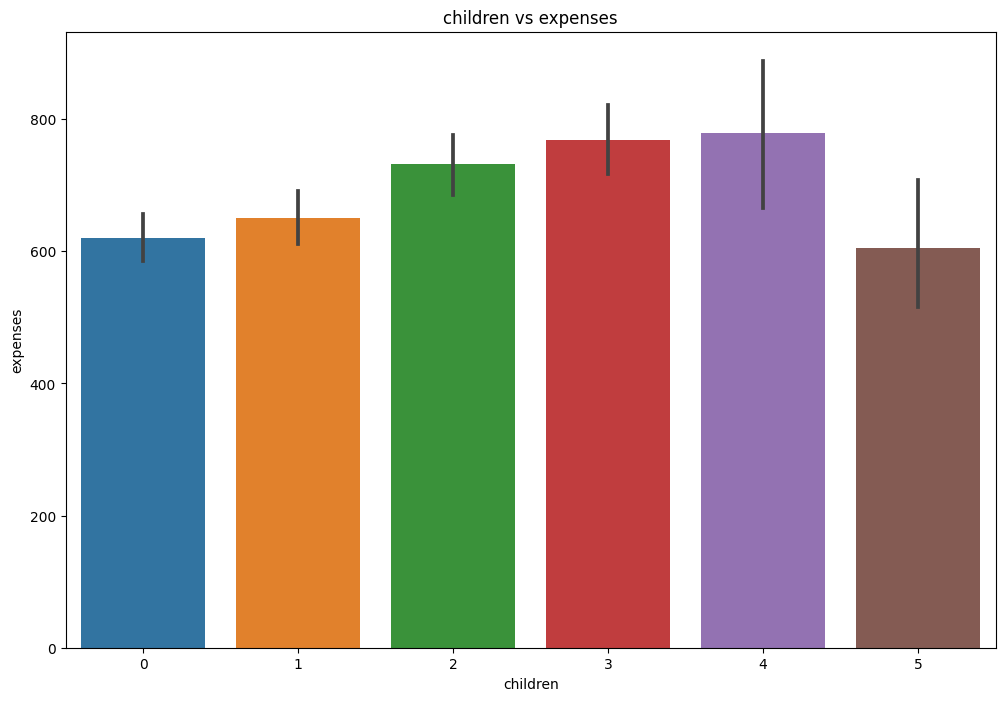

In [21]:
# children vs expenses
# no. of childrens of a person has a very interesting dependency on insurance costs

plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'expenses', data = df)

plt.title('children vs expenses')

Text(0.5, 1.0, 'region vs expenses')

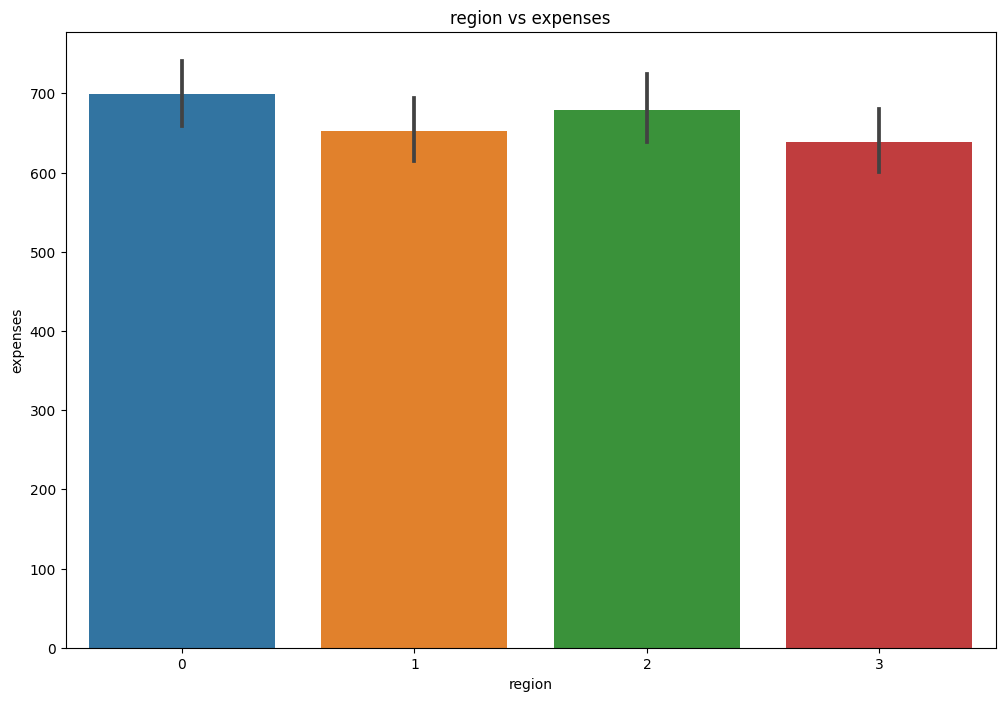

In [22]:
# region vs expenses
# From the graph we can see that the region actually does not play any role in determining the insurance expenses

plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'expenses', data = df)

plt.title('region vs expenses')

Text(0.5, 1.0, 'smoker vs expenses')

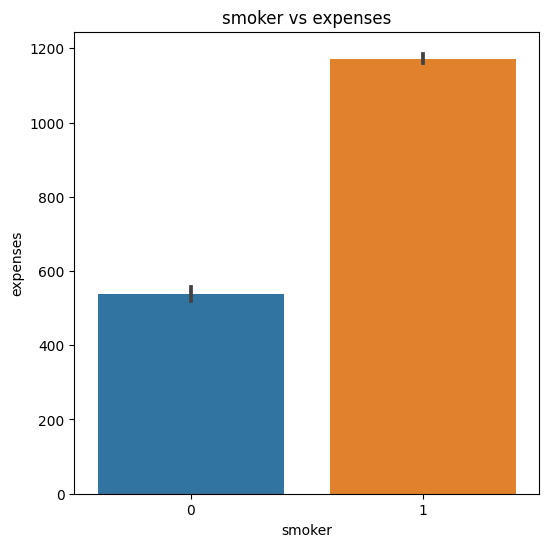

In [23]:
# smoker vs expenses
# from the graph below, it is visible that smokers have more insurance expenses than the non smokers

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'expenses', data = df)

plt.title('smoker vs expenses')

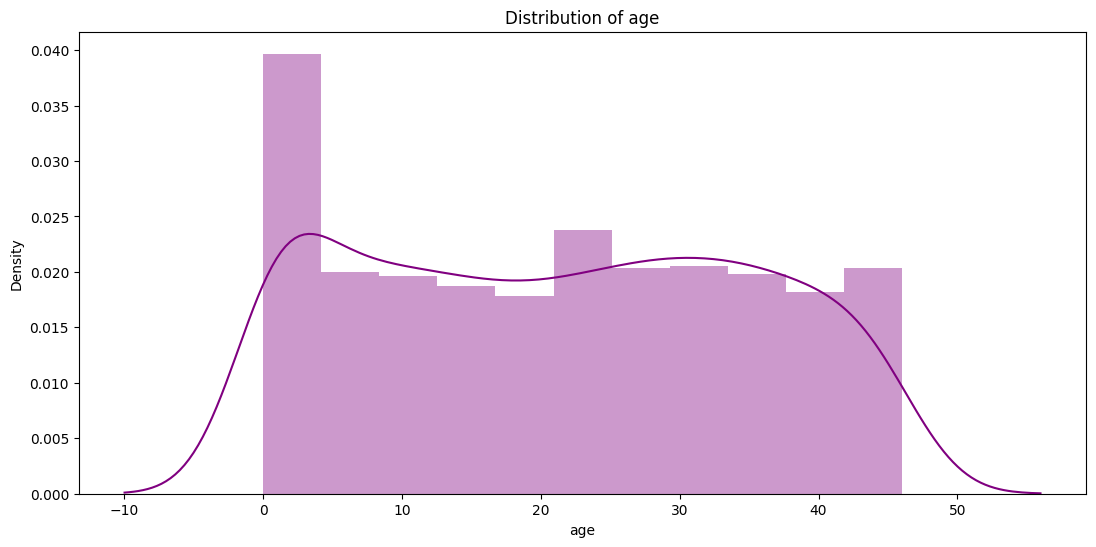

In [24]:
plt.figure(figsize=(13,6))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'purple')

Judging by the party life at UVa, we can see why so many young adults even seek medical care.

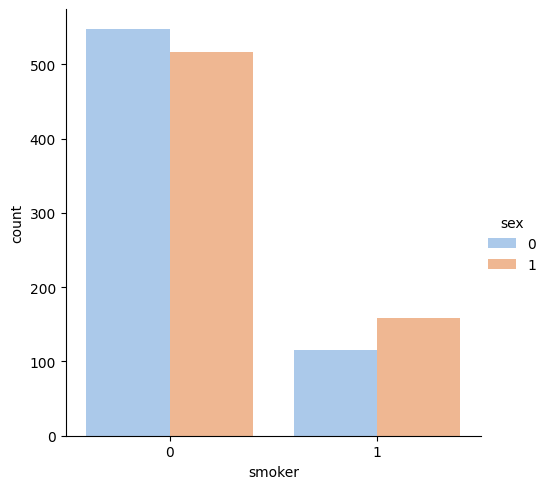

In [25]:
sns.catplot(x="smoker", kind="count", hue = 'sex', data = df , palette='pastel');
plt.show()

Luckily, the majority understands the downsides of smoking.

The data seems pretty balanced with a slight skew towards male.

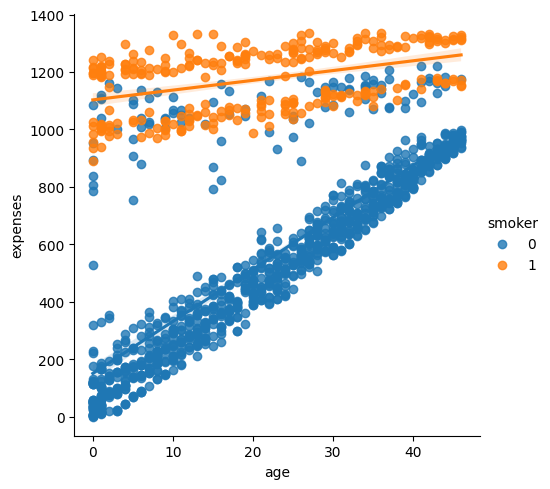

In [54]:
sns.lmplot(x="age", y="expenses", hue="smoker", data=df)
ax.set_title('Smokers and non-smokers')
plt.show()

While it seems obvious that the charges increase linearly with age, smoking appears to be the highest contributor to charges.

In [39]:
scaler= StandardScaler()
x=df.drop(columns= ['expenses',"region"], axis=0)
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [40]:
y=df['expenses']

In [41]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)


### Model Evaluation

error distribution

MAE, MSE, RMSE

R Squared

In [42]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [43]:
accuracy_matrix=pd.DataFrame(index= ["Mean Absolute Error",
                        "Mean Square Error",
                        "Residual Error(RSS)",
                        "Root mean Square",
                        "R2 Score (CoD)"])

In [44]:
def reg_model(model):
    m=model()
    m.fit(x_train, y_train)
    y_pred=m.predict(x_test)
    accuracy_matrix[str(model).split(".")[-1][:-2]]=[round(mean_absolute_error(y_test, y_pred),3),
                             round(mean_squared_error(y_test, y_pred),3),
                             round(np.sum(np.square(y_test- y_pred)),3), 
                             round(np.sqrt(mean_squared_error(y_test, y_pred)),3),
                             round(r2_score(y_test, y_pred),3)]

In [45]:
reg_model(LinearRegression)
reg_model(Lasso)
reg_model(Ridge)
reg_model(RandomForestRegressor)
reg_model(KNeighborsRegressor)

In [46]:
accuracy_matrix

,LinearRegression,Lasso,Ridge,RandomForestRegressor,KNeighborsRegressor
Mean Absolute Error,127.105,127.413,127.207,88.091,104.151
Mean Square Error,32925.124,32966.831,32930.083,28417.359,31718.746
Residual Error(RSS),8823933.166,8835110.669,8825262.330,7615852.161,8500624.000
Root mean Square,181.453,181.568,181.466,168.574,178.098
R2 Score (CoD),0.792,0.791,0.791,0.820,0.799


### Random forest regressor have the highest R square value. Plotting visualization grraph

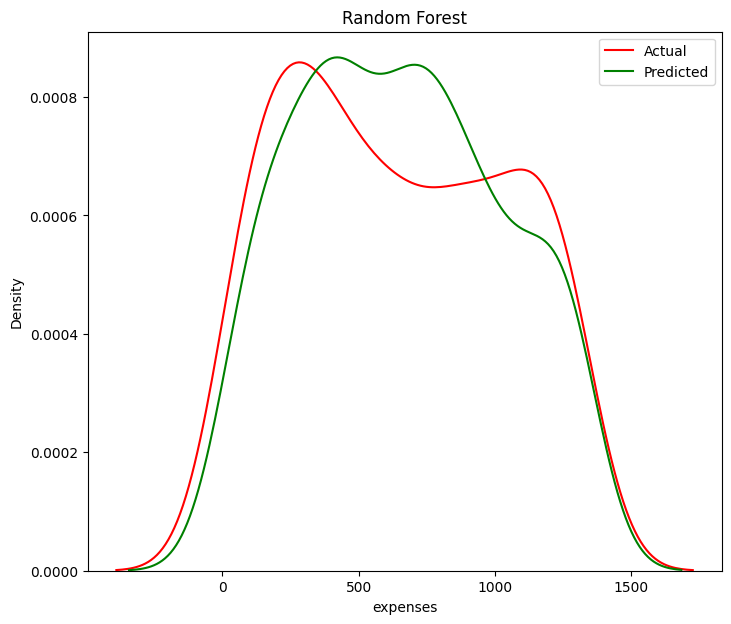

In [47]:
model_random= RandomForestRegressor()
model_random.fit(x_train, y_train)
y_pred_rf=model_random.predict(x_test)

plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
ax1=sns.distplot(y_test, hist=False, color='r', label="Actual")
sns.distplot(y_pred_rf, hist=False, color='g', ax=ax1, label="Predicted")
plt.legend(labels=["Actual","Predicted"])
plt.title("Random Forest")
plt.show()

### Testing

In [50]:
enter= [int(input("Enter Age: ")), 
        input("Enter Sex: "), 
        float(input("Enter BMI: ")), 
        int(input("Enter number of childern  you have")),
        input("Are you a smoker: (Y/N): ")]

if enter[1]=="F":
    enter[1]=0
elif enter[1]=="M":
    enter[1]==1
    
if enter[-1]=="N":
    enter[-1]=0
else:
    enter[-1]=1


print("Expected Premium price is : ", model_random.predict([enter])[0])

Enter Age: 29
Enter Sex: F
Enter BMI: 22
Enter number of childern  you have0
Are you a smoker: (Y/N): Y
Expected Premium price is :  1324.55
